In [131]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers
from sa_decomp_layer import SADecompLayer

from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
from tensorflow.python.client import device_lib
#tf.disable_v2_behavior()

#print(device_lib.list_local_devices())
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

print(tf.__version__ )

Num GPUs Available:  1
2.9.1


In [43]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


BEFORE:



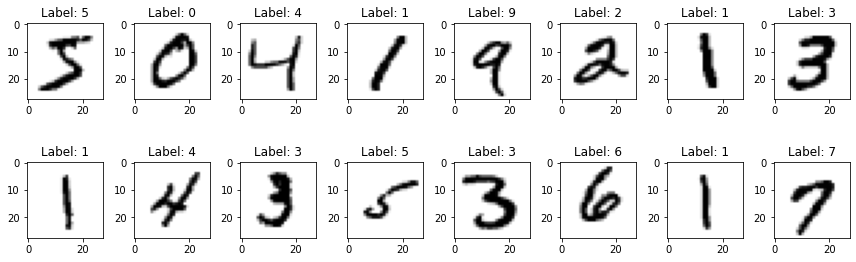

AFTER:



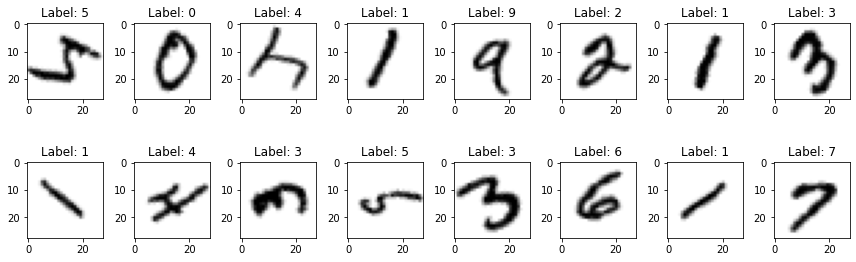

In [44]:
# specify the maximum rotation_range angle
rotation_range_val = 180
# import relevant library
# create the class object
datagen = ImageDataGenerator(rotation_range=rotation_range_val)
# fit the generator
datagen.fit(x_train.reshape(x_train.shape[0], 28, 28, 1))
# define number of rows & columns
num_row = 2
num_col = 8
num = num_row*num_col
# plot before
print('BEFORE:\n')
# plot images
fig1, axes1 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
     ax = axes1[i//num_col, i%num_col]
     ax.imshow(x_train[i], cmap='gray_r')
     ax.set_title('Label: {}'.format(y_train[i]))
plt.tight_layout()
plt.show()
# plot after
print('AFTER:\n')
fig2, axes2 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for X, Y in datagen.flow(x_train.reshape(x_train.shape[0], 28, 28, 1), y_train.reshape(y_train.shape[0], 1),batch_size=num,shuffle=False):
     for i in range(0, num):
          ax = axes2[i//num_col, i%num_col]
          ax.imshow(X[i].reshape(28,28), cmap='gray_r')
          ax.set_title('Label: {}'.format(int(Y[i])))
     break
plt.tight_layout()
plt.show()


In [54]:
def rotateDataset(x,y, maxRot = 180, h=28, w=28, batch_size=100):
    datagen = ImageDataGenerator(rotation_range=maxRot)
    # fit the generator
    datagen.fit(x.reshape(x.shape[0], 28, 28, 1))
    out = datagen.flow(x.reshape(x.shape[0], h, w, 1), y.reshape(y.shape[0], -1), batch_size=batch_size)


    return  out


In [46]:


# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [115]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        SADecompLayer( w_size=2, name='sad1_1'),

        layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        SADecompLayer( w_size=4, name='sad2_1'),

        layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        SADecompLayer( w_size=5, name='sad3_1'),


        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(1200, activation='relu'),
        layers.Dense(3200, activation='relu'),

        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()


Input shape :  Tensor("Shape:0", shape=(4,), dtype=int32)
Input shape :  Tensor("Shape:0", shape=(4,), dtype=int32)
Input shape :  Tensor("Shape:0", shape=(4,), dtype=int32)
Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sad1_1 (SADecompLayer)      (None, 28, 28, 1)         0         
                                                                 
 conv2d_52 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 sad2_1 (SADecompLayer)      (None, 13, 13, 64)        0         
                                                                 
 conv2d_53 (Conv2D)          (None, 11, 11, 128)       73856     
           

In [116]:
batch_size = 128
epochs = 10

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 83s 192ms/step - loss: 1.2452 - accuracy: 0.5529 - val_loss: 0.6125 - val_accuracy: 0.7987
Epoch 2/10
422/422 [==============================] - 80s 190ms/step - loss: 0.6640 - accuracy: 0.7750 - val_loss: 0.4135 - val_accuracy: 0.8695
Epoch 3/10
422/422 [==============================] - 80s 189ms/step - loss: 0.4923 - accuracy: 0.8346 - val_loss: 0.3812 - val_accuracy: 0.8827
Epoch 4/10
422/422 [==============================] - 80s 191ms/step - loss: 0.4305 - accuracy: 0.8565 - val_loss: 0.2995 - val_accuracy: 0.9050
Epoch 5/10
422/422 [==============================] - 80s 189ms/step - loss: 0.3687 - accuracy: 0.8780 - val_loss: 0.2362 - val_accuracy: 0.9265
Epoch 6/10
422/422 [==============================] - 80s 190ms/step - loss: 0.3318 - accuracy: 0.8890 - val_loss: 0.2154 - val_accuracy: 0.9305
Epoch 7/10
266/422 [=================>............] - ETA: 26s - loss: 0.3116 - accuracy: 0.8963

KeyboardInterrupt: 

In [117]:
#rotateDataset(x_test,y_test)
score = model.evaluate_generator(rotateDataset(x_test,y_test), verbose=1)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


c:\Users\AN46710\Anaconda3\envs\masters\lib\site-packages\ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


100/100 [==============================] - 14s 131ms/step - loss: 2.2758 - accuracy: 0.4342
Test loss: 2.275768518447876
Test accuracy: 0.4341999888420105


In [132]:
def get_cnn_out(input, layer_num):
    get_layer_output = K.function([model.input], [l.output for l in model.layers][layer_num])
    layer_out = np.array(get_layer_output(input))
    return layer_out[0]

1/1 [==============================] - 0s 42ms/step
6 4


TypeError: Invalid shape (1, 26, 64) for image data

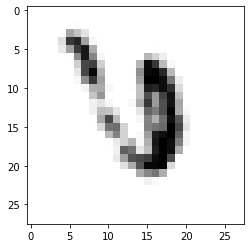

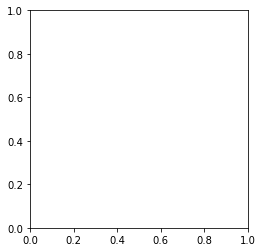

In [152]:
get_layer_output = K.function([model.input], model.layers[1].output)

for X,Y in rotateDataset(x_test,y_test, batch_size=1, maxRot=90):
    print(np.argmax(Y), np.argmax(model.predict(X)))
    plt.figure(0)  
    plt.imshow(X.reshape(28,28), cmap='gray_r')  
    plt.figure(1)  
    layer_out = np.array(get_layer_output([X]))

    plt.imshow(layer_out[:,:,1])   
    break